In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
X = df.iloc[:, 0:20]
y = df.iloc[:, -1]

In [8]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [15]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [13]:
featureScores = pd.concat([dfcolumns, dfscores ], axis=1)

In [17]:
dfscores

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [21]:
featureScores.head(10)

,0,0
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [24]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [26]:
model.feature_importances_

array([0.06213834, 0.02004698, 0.03420935, 0.01918154, 0.0323457 ,
       0.01829296, 0.0357301 , 0.03409031, 0.03669018, 0.0325184 ,
       0.03287631, 0.04667647, 0.04740114, 0.39299364, 0.03412732,
       0.03409385, 0.0340297 , 0.01438266, 0.01866011, 0.01951494])

In [27]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

<Axes: >

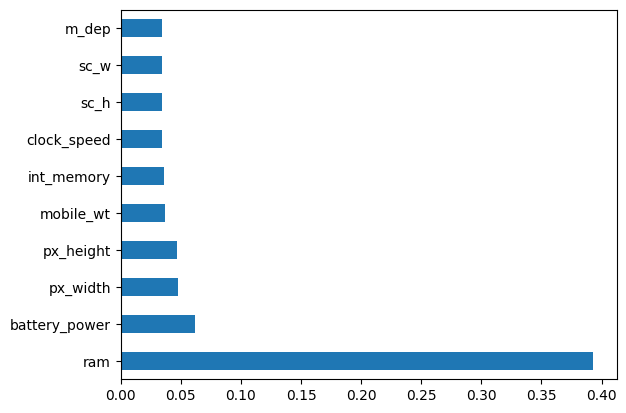

In [28]:
feat_importances.nlargest(10).plot(kind='barh')

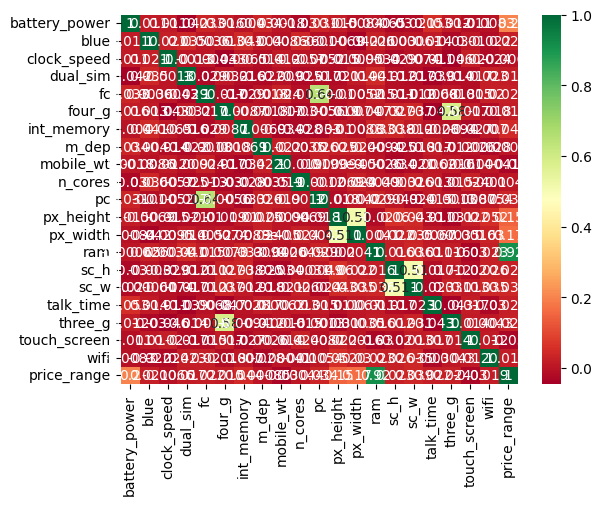

In [33]:
import seaborn as sns
cormat = df.corr()
top_corr_features = cormat.index

g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')